# TP N6

Una empresa fabrica varios tipos de autopartes para las más importantes
empresas automotrices y recientemente ha firmado un nuevo contrato para producir bombas de agua. Para ello, la capacidad de producción planeada es de 130 unidades por día, por cada turno.
Debido a las fluctuaciones en la línea de ensamble, la demanda histórica presenta una distribución Normal de media 150 unidades diarias con un desvío estándar de 25 unidades. Para mantener un inventario suficiente que cumpla con los requerimientos de los clientes, los gerentes de la fábrica están considerando una nueva política que consiste en producir durante un segundo turno si el inventario cae a 50 o menos unidades al final del día. El costo de mantener el stock es de $70 por unidad por día.

Para la planificación del presupuesto anual, los gerentes necesitan saber cuántos turnos adicionales serán necesarios en promedio si se aplica la nueva política de producción. Por último, también desean calcular el costo anual promedio del mantenimiento de stock.

Consideraciones:
* El año se considera con 250 días hábiles.
* Es necesario simular 30 años para realizar las estimaciones.
* El inventario cuenta inicialmente con 90 unidades del producto.
* Se puede agregar un turno por día.

a) Defina el o los objetivos de la simulación.

b) Describa el modelo:
    
* Variables de entrada, salida y estado.
* Entidades y atributos.
* Clasificación.
* Características del inventario.

c) Definir y justificar la “visión del mundo” y la forma de avance del tiempo que utilizará para realizar la simulación.

d) Realice un diagrama de flujo o pseudocódigo que indique a grandes rasgos cómo va a realizar la simulación.

e) Realice la simulación con el lenguaje de preferencia. Repita la simulación utilizando 60, 70 y 80 como cantidad mínima de unidades diarias en el inventario. 

f) Calcule promedios de costos anuales para los 3 valores y los correspondientes I.C (95%). Grafique histogramas representativos.

a) Objetivo: concocer el promedio de cuantos turnos adicionales son necesarios si aplica la politica del segundo turno y calcular el costo anual promedio del mantenimiento del stock.

b)

- Entrada: punto de reorden; costo mantenimiento unidad; inventario inicial; produccion por turno.
- Salidas: costo de mantenimiento anual; promedio de turnos.
- Estado: inventario; costo de mantenimiento.
- Entidades:
    1. Demanda -> distribucion normal con media de 150 unidades y desvio estandar de 25 unidades.
- Clasificacion: discreto, estocastico, matematico y formal, de simulacion.
- Caracteristicas del inventario: demanda probabilistica; politica de pedidos con revision continua siendo el punto de reorden de 50 unidades; costo de conservacion de $70 por unidad.

c) Se utiliza planificacion de eventos, ya que al tomar el enfoque de administracion de procesos o escaneo de actividades, complejiza el modelo. Solo se cuenta con una entidad, y solo interesa saber estado del mismo cuando ocurre una demanda o un punto de reorden. Se utiliza avance de tiempo variable ya que se adopta al enfoque de planificacion de eventos.

d)

e) Realice la simulación con el lenguaje de preferencia. Repita la simulación utilizando 60, 70 y 80 como cantidad mínima de unidades diarias en el inventario. 

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [147]:
PRODUCCION = 130 # por turno
PUNTO_REORDEN = 50
COSTO_MANT = 70
DIAS = 250
ANIOS = 30
STOCK_INICIAL = 90

In [148]:
def simulacion_autopartes(stock = STOCK_INICIAL, punto_reorden = PUNTO_REORDEN):
    contadores = {
        'total_turnos_adicionales': [],
        'total_costo_mantenimiento': [],
    }
    
    for anio in range(ANIOS):
        turno_adicional = 0
        costo_mantenimiento = 0
        
        for dia in range(DIAS):
            demanda = np.random.normal(150, 25)
            if stock >= demanda:
                stock -= demanda
            
            if stock < punto_reorden:
                stock += PRODUCCION * 2
                turno_adicional += 1
            else:
                stock += PRODUCCION
            
            costo_mantenimiento += COSTO_MANT * stock
        
        contadores['total_turnos_adicionales'].append(turno_adicional)
        contadores['total_costo_mantenimiento'].append(costo_mantenimiento)
    

    return contadores

In [149]:
sim1 = simulacion_autopartes()
promedio_turnos = np.mean(sim1.get('total_turnos_adicionales'))
promedio_costo_mantenimiento = np.mean(sim1.get('total_costo_mantenimiento'))
print(f"Cantidad de turnos adicionales x anio: {sim1.get('total_turnos_adicionales')}")
print(f"Promedio de turnos por dia: {promedio_turnos}")
print(f"Promedio de costo de mantenimiento: {promedio_costo_mantenimiento}")

Cantidad de turnos adicionales x anio: [34, 39, 37, 35, 36, 38, 37, 29, 38, 30, 31, 39, 31, 37, 33, 37, 36, 33, 41, 32, 33, 34, 33, 42, 30, 37, 37, 35, 34, 41]
Promedio de turnos por dia: 35.3
Promedio de costo de mantenimiento: 4394949.86362368


In [150]:
sim2 = simulacion_autopartes(stock=STOCK_INICIAL, punto_reorden=60)
promedio_turnos2 = np.mean(sim2.get('total_turnos_adicionales'))

print(f"Cantidad de turnos adicionales x anio (punto de reorden 60): {sim2.get('total_turnos_adicionales')}")
print(f"Promedio de turnos por dia (punto de reorden 60): {promedio_turnos2}")

sim3 = simulacion_autopartes(stock=STOCK_INICIAL, punto_reorden=70)
promedio_turnos3 = np.mean(sim3.get('total_turnos_adicionales'))
print(f"Cantidad de turnos adicionales x anio (punto de reorden 70): {sim3.get('total_turnos_adicionales')}")
print(f"Promedio de turnos por dia (punto de reorden 70): {promedio_turnos3}")


sim4 = simulacion_autopartes(stock=STOCK_INICIAL, punto_reorden=80)
promedio_turnos4 = np.mean(sim4.get('total_turnos_adicionales'))
print(f"Cantidad de turnos adicionales x anio (punto de reorden 80): {sim4.get('total_turnos_adicionales')}")
print(f"Promedio de turnos por dia (punto de reorden 80): {promedio_turnos4}")


Cantidad de turnos adicionales x anio (punto de reorden 60): [34, 41, 38, 37, 36, 37, 35, 37, 39, 39, 37, 40, 37, 39, 34, 37, 38, 40, 38, 36, 44, 38, 35, 39, 39, 36, 35, 33, 42, 37]
Promedio de turnos por dia (punto de reorden 60): 37.56666666666667
Cantidad de turnos adicionales x anio (punto de reorden 70): [38, 38, 42, 42, 42, 33, 38, 42, 45, 43, 39, 42, 36, 39, 35, 35, 41, 39, 32, 41, 33, 36, 36, 39, 40, 37, 29, 37, 39, 40]
Promedio de turnos por dia (punto de reorden 70): 38.266666666666666
Cantidad de turnos adicionales x anio (punto de reorden 80): [34, 36, 39, 37, 38, 40, 35, 41, 39, 37, 41, 42, 30, 39, 40, 37, 38, 37, 34, 41, 40, 37, 39, 41, 40, 40, 40, 39, 37, 41]
Promedio de turnos por dia (punto de reorden 80): 38.3


c) Calcule promedios de costos anuales para los 3 valores y los correspondientes I.C (95%). Grafique histogramas representativos.


In [151]:
promedio_costo_mantenimiento2 = np.mean(sim2.get('total_costo_mantenimiento'))
promedio_costo_mantenimiento3 = np.mean(sim3.get('total_costo_mantenimiento'))
promedio_costo_mantenimiento4 = np.mean(sim4.get('total_costo_mantenimiento'))

ic2 = stats.t.interval(0.95, len(sim2.get('total_costo_mantenimiento')) - 1, loc=promedio_costo_mantenimiento2, scale=stats.sem(sim2.get('total_costo_mantenimiento')))
ic3 = stats.t.interval(0.95, len(sim3.get('total_costo_mantenimiento')) - 1, loc=promedio_costo_mantenimiento3, scale=stats.sem(sim3.get('total_costo_mantenimiento')))
ic4 = stats.t.interval(0.95, len(sim4.get('total_costo_mantenimiento')) - 1, loc=promedio_costo_mantenimiento4, scale=stats.sem(sim4.get('total_costo_mantenimiento')))

print(f"Promedio de costo de mantenimiento (punto de reorden 60): {promedio_costo_mantenimiento2}")
print(f"Intervalo de confianza (punto de reorden 60): [{ic2[0]:.2f}, {ic2[1]:.2f}]")

print(f"Promedio de costo de mantenimiento (punto de reorden 70): {promedio_costo_mantenimiento3}")
print(f"Intervalo de confianza (punto de reorden 70): [{ic3[0]:.2f}, {ic3[1]:.2f}]")

print(f"Promedio de costo de mantenimiento (punto de reorden 80): {promedio_costo_mantenimiento4}")
print(f"Intervalo de confianza (punto de reorden 80): [{ic4[0]:.2f}, {ic4[1]:.2f}]")

Promedio de costo de mantenimiento (punto de reorden 60): 4552218.850275343
Intervalo de confianza (punto de reorden 60): [4529398.36, 4575039.34]
Promedio de costo de mantenimiento (punto de reorden 70): 4735923.070189055
Intervalo de confianza (punto de reorden 70): [4709361.35, 4762484.79]
Promedio de costo de mantenimiento (punto de reorden 80): 4907504.272902134
Intervalo de confianza (punto de reorden 80): [4880859.09, 4934149.46]


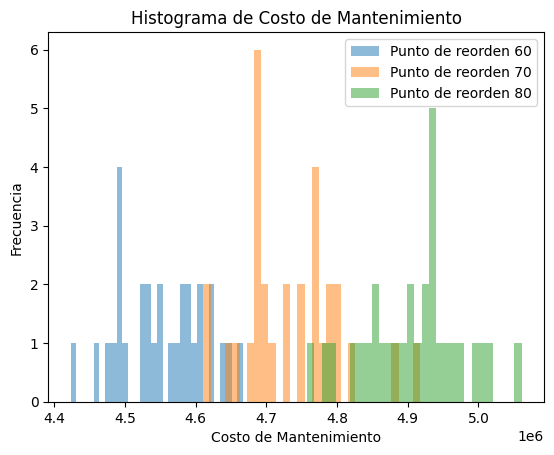

In [152]:
hist2 = plt.hist(sim2.get('total_costo_mantenimiento'), bins=30, alpha=0.5, label='Punto de reorden 60')
hist3 = plt.hist(sim3.get('total_costo_mantenimiento'), bins=30, alpha=0.5, label='Punto de reorden 70')
hist4 = plt.hist(sim4.get('total_costo_mantenimiento'), bins=30, alpha=0.5, label='Punto de reorden 80')
plt.title('Histograma de Costo de Mantenimiento')
plt.xlabel('Costo de Mantenimiento')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()